In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dfs = []
with open('output_fedcs.json') as f:
    for line in f.readlines():
        json_data = pd.json_normalize(json.loads(line))
        dfs.append(json_data)
fedcs_df = pd.concat(dfs, sort=False) # or sort=True depending on your needs

In [5]:
fedcs_df

,server_round,client_name,execution_time,upload_time,total_time,status,reason,current_timestamp,state.cpu,state.ram,state.network_bandwidth,state.i_reliability,state.performance_tier,state.expected_execution_time,state.i_performance_factor,state.client_name,actual_execution_time,train_output.accuracy,train_output.avg_epoch_loss
0,0,descriptive-car,45.6,0.146466,80.000000,fail,reliability failure,2023-06-23 14:56:24.932765,16,64,35.75,0.24163,3,40,1.14,descriptive-car,NaN,NaN,NaN
0,0,orthogonal-title,53.6,0.168962,80.000000,fail,reliability failure,2023-06-23 14:56:35.732485,16,64,30.99,0.06165,3,40,1.34,orthogonal-title,NaN,NaN,NaN
0,0,few-ocean,42.8,0.169290,80.000000,fail,reliability failure,2023-06-23 14:56:40.716648,16,64,30.93,0.51418,3,40,1.07,few-ocean,NaN,NaN,NaN
0,0,rainy-map,48.4,0.122598,48.522598,success,NaN,2023-06-23 14:59:18.169823,16,64,42.71,0.03469,3,40,1.21,rainy-map,175.774053,[0.2832222222222222],[0.0]
0,0,sweet-tunnel,47.6,0.120150,47.720150,success,NaN,2023-06-23 14:59:20.822352,16,64,43.58,0.02539,3,40,1.19,sweet-tunnel,174.350641,[0.2891111111111111],[0.0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,greasy-age,38.8,0.308917,39.108917,success,NaN,2023-06-23 15:12:56.936737,16,64,16.95,0.10010,3,40,0.97,greasy-age,144.227004,[0.2991111111111111],[0.0]
0,0,lively-module,31.2,0.327874,31.527874,success,NaN,2023-06-23 15:12:57.150713,16,64,15.97,0.16656,3,40,0.78,lively-module,146.383403,[0.29088888888888886],[0.0]
0,0,wan-win,29.6,0.325834,29.925834,success,NaN,2023-06-23 15:12:57.621165,16,64,16.07,0.03670,3,40,0.74,wan-win,144.919896,[0.29633333333333334],[0.0]
0,0,blaring-stable,42.0,0.315051,42.315051,success,NaN,2023-06-23 15:12:57.654044,16,64,16.62,0.06845,3,40,1.05,blaring-stable,146.899807,[0.3015555555555556],[0.0]


In [6]:
df_server_rounds = fedcs_df[['server_round', 'client_name']].groupby(['server_round']).count().reset_index()
df_server_round_timeout_failures = fedcs_df[fedcs_df.reason == 'timeout failure'][['server_round', 'client_name']].groupby(['server_round']).count().reset_index()
df_server_round_reliability_failures = fedcs_df[fedcs_df.reason == 'reliability failure'][['server_round', 'client_name']].groupby(['server_round']).count().reset_index()
df_server_round_success = fedcs_df[fedcs_df.status == 'success'][['server_round', 'client_name']].groupby(['server_round']).count().reset_index()

In [7]:
df_server_round_timeout_failures

,server_round,client_name


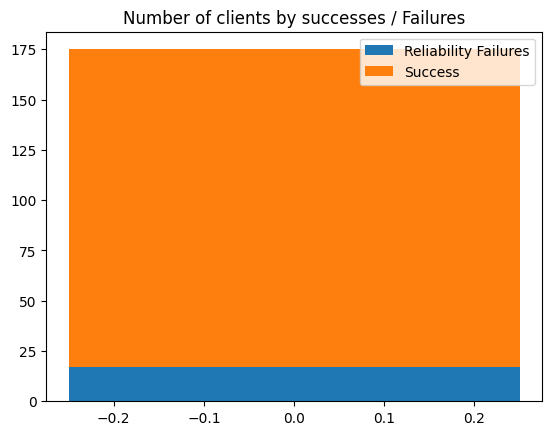

In [10]:

species = np.array(df_server_rounds['server_round'])
weight_counts = {
    "Reliability Failures": np.array(df_server_round_reliability_failures['client_name']),
    "Success": np.array(df_server_round_success['client_name'])
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(10)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of clients by successes / Failures")
ax.legend(loc="upper right")

plt.show()